# NLP Emotion Classification From Text

**This project is based on Machine Learning and Natural Language Processing (NLP) techniques and focuses on emotion classification. The dataset consists of sentences labeled with different emotions (e.g., joy, anger, sadness). The goal is to build machine learning models that can automatically classify emotions from raw text.**


# **Setup & Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk


from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords

In [ ]:
import io
from google.colab import files
uploaded = files.upload()

Saving train.txt to train.txt


In [3]:
# Checking the first few rows and dimension of the dataset
df = pd.read_csv(io.BytesIO(uploaded["train.txt"]))

In [ ]:
df = pd.read_csv("train.txt", sep=";", header=None, names=["text", "emotion"])

unique_emotion = {emo: i for i, emo in enumerate(df["emotion"].unique())}
emotion_numbers = {i: emo for emo, i in unique_emotion.items()}
df["label"] = df["emotion"].map(unique_emotion)

In [ ]:
df.head()

,text,emotion,label
0,i didnt feel humiliated,sadness,0
1,i can go from feeling so hopeless to so damned...,sadness,0
2,im grabbing a minute to post i feel greedy wrong,anger,1
3,i am ever feeling nostalgic about the fireplac...,love,2
4,i am feeling grouchy,anger,1


In [ ]:
# --- SETUP ---
nltk.download('stopwords')
stop_words = set(stopwords.words("english")) | STOPWORDS | {"im", "ive", "dont", "cant", "feeling", "feel", "like"}

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# --- CLEAN TEXT FUNCTION ---
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return " ".join([word for word in text.split() if word not in stop_words])

df["clean_text"] = df["text"].astype(str).apply(clean_text)

In [ ]:
df

,text,emotion,label,clean_text
0,i didnt feel humiliated,sadness,0,didnt humiliated
1,i can go from feeling so hopeless to so damned...,sadness,0,go hopeless damned hopeful around someone care...
2,im grabbing a minute to post i feel greedy wrong,anger,1,grabbing minute post greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,2,nostalgic fireplace know still property
4,i am feeling grouchy,anger,1,grouchy
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,0,brief time beanbag said anna beaten
15996,i am now turning and i feel pathetic that i am...,sadness,0,turning pathetic still waiting tables subbing ...
15997,i feel strong and good overall,joy,5,strong good overall
15998,i feel like this was such a rude comment and i...,anger,1,rude comment glad


**EDA**

In [ ]:
y= df['emotion'].value_counts()
x= df['emotion'].unique()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center',va='bottom')

plt.figure(figsize=(12,6))
df['emotion'].value_counts().plot(kind='bar',color=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Distribution of Sentiment')
addlabels(x, y)
plt.xticks(rotation=45)
plt.show()

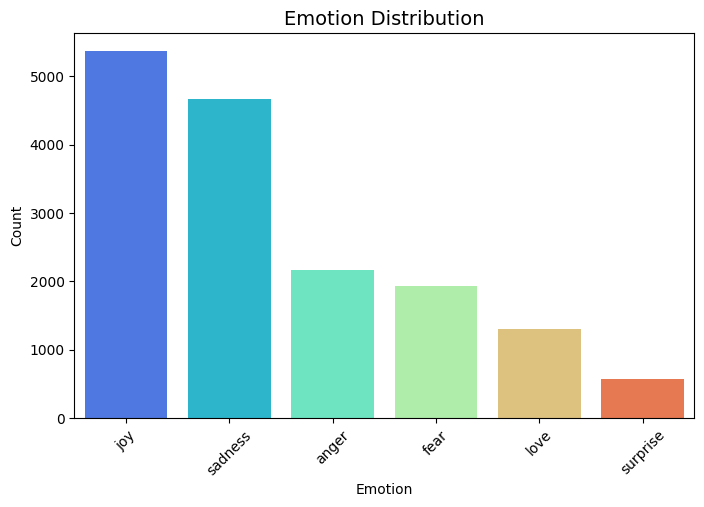

In [ ]:
# --- EMOTION DISTRIBUTION ---
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="emotion", order=df["emotion"].value_counts().index, palette="rainbow")
plt.title("Emotion Distribution", fontsize=14)
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

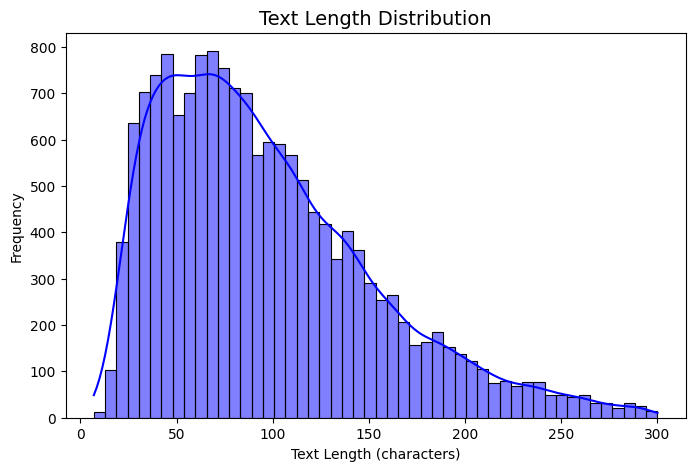

In [ ]:
# --- TEXT LENGTH DISTRIBUTION ---
df["text_length"] = df["text"].apply(len)
plt.figure(figsize=(8,5))
sns.histplot(df["text_length"], bins=50, kde=True ,color='blue')
plt.title("Text Length Distribution", fontsize=14)
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.show()

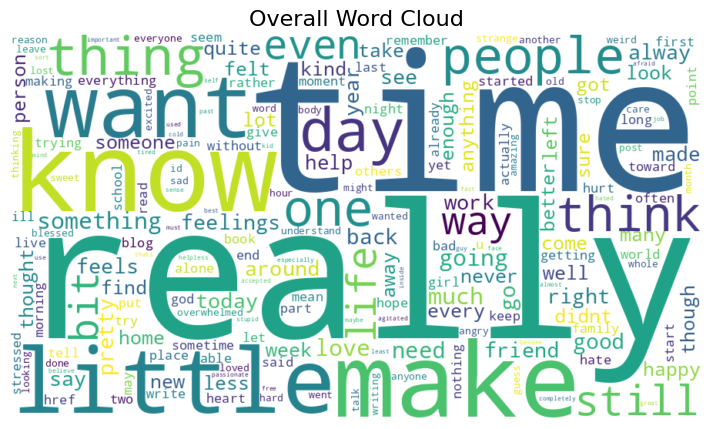

In [ ]:
# --- OVERALL WORD CLOUD ---
all_text = " ".join(df["clean_text"])
wc_all = WordCloud(width=900, height=500, background_color="white", collocations=False).generate(all_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_all, interpolation="bilinear")
plt.axis("off")
plt.title("Overall Word Cloud", fontsize=16)
plt.show()

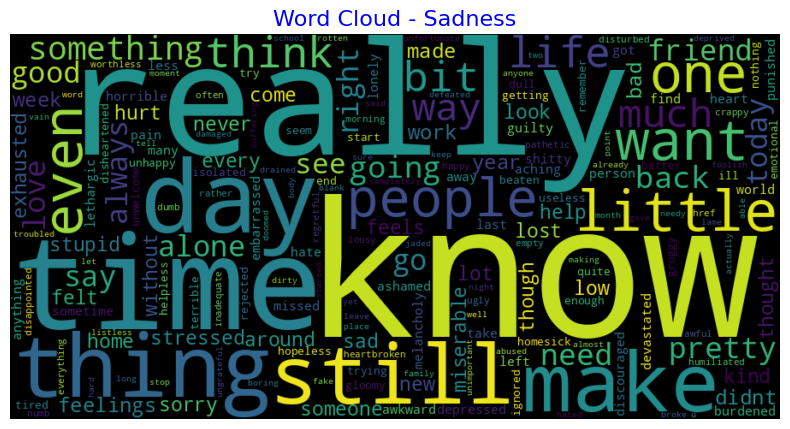

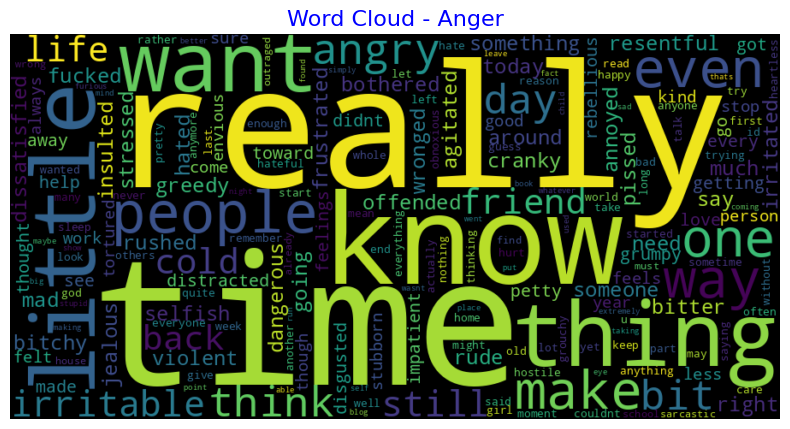

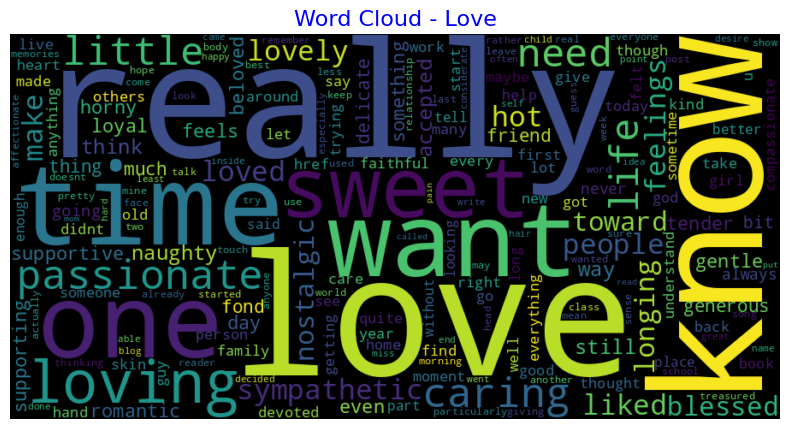

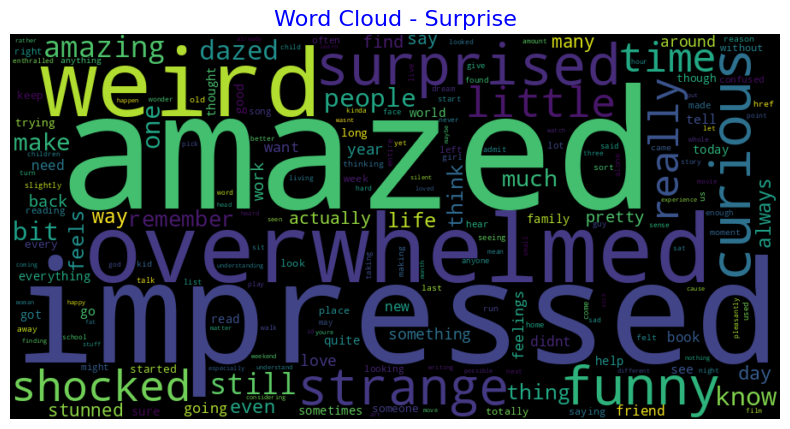

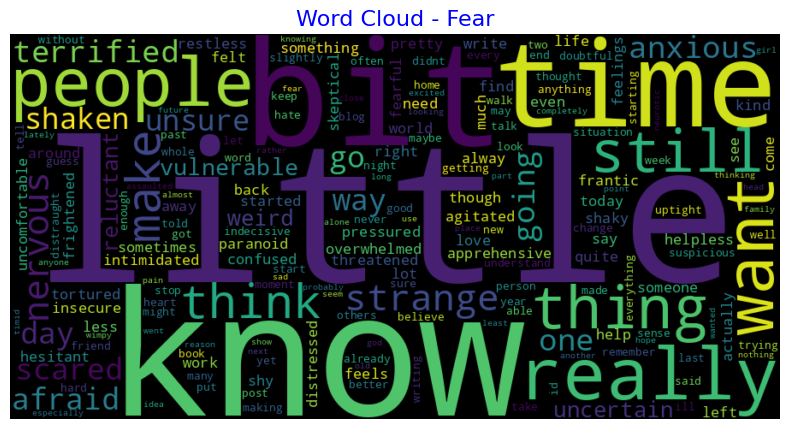

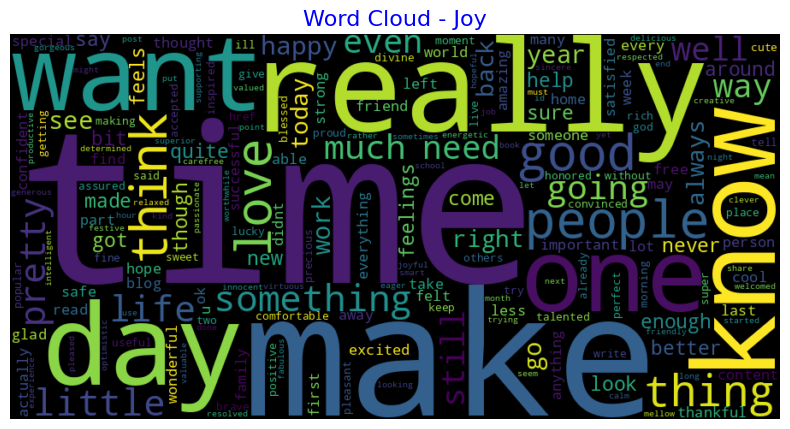

In [ ]:
# --- WORD CLOUDS PER EMOTION ---
emotions = df["emotion"].unique()
for emo in emotions:
    text = " ".join(df[df["emotion"] == emo]["clean_text"])
    wc = WordCloud(width=900, height=450, background_color="black", collocations=False).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {emo.capitalize()}", fontsize=16 ,color='blue')
    plt.show()


In [ ]:
# --- TOP WORDS / NGRAMS PER EMOTION ---
def get_top_ngrams(texts, ngram_val=1, top_n=10):
    tokens = " ".join(texts).split()
    ngram_list = list(ngrams(tokens, ngram_val))
    common = Counter(ngram_list).most_common(top_n)
    df_top = pd.DataFrame(common, columns=["ngram", "count"])
    df_top["ngram"] = df_top["ngram"].apply(lambda x: " ".join(x))
    return df_top

for emo in emotions:
    texts = df[df["emotion"] == emo]["clean_text"]


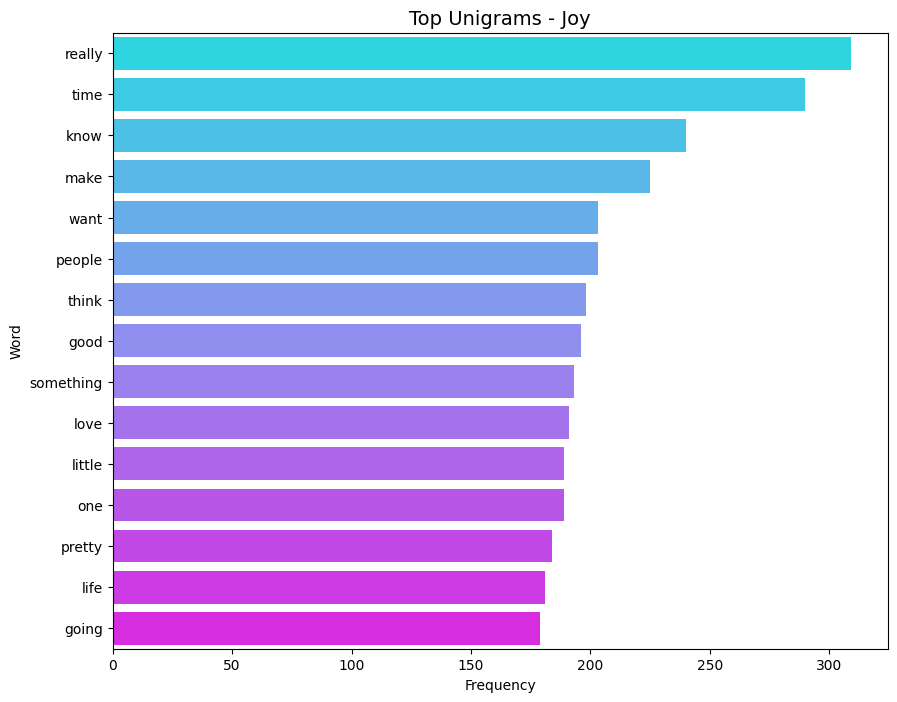

In [ ]:
# Unigrams
uni = get_top_ngrams(texts, 1, 15)
plt.figure(figsize=(10,8))
sns.barplot(data=uni, x="count", y="ngram", palette="cool")
plt.title(f"Top Unigrams - {emo.capitalize()}", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()



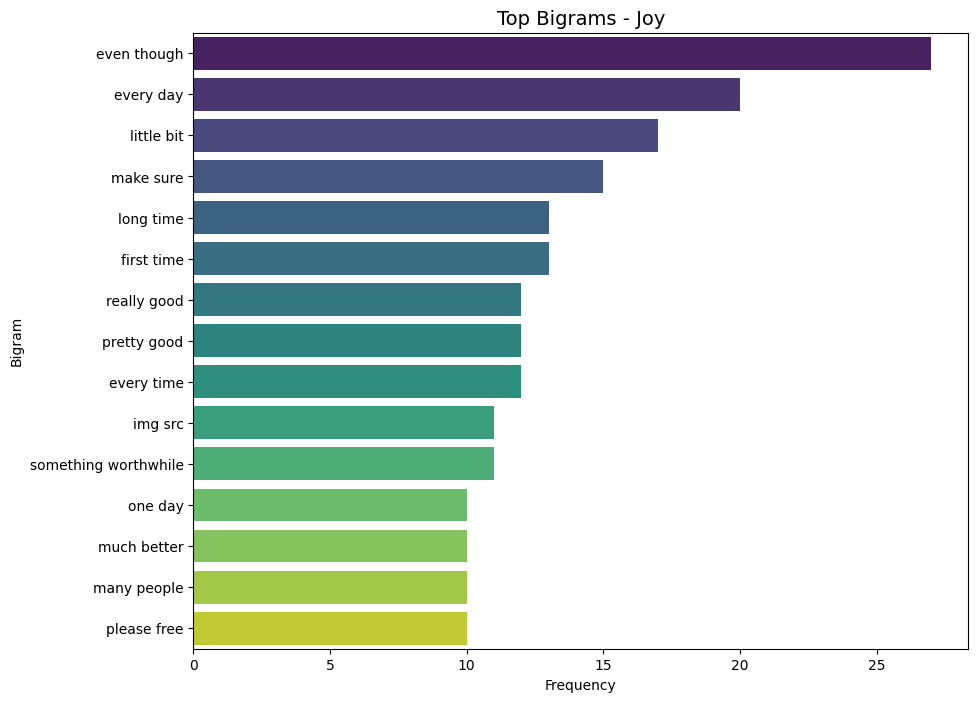

In [ ]:
   # Bigrams
bi = get_top_ngrams(texts, 2, 15)
plt.figure(figsize=(10,8))
sns.barplot(data=bi, x="count", y="ngram", palette="viridis")
plt.title(f"Top Bigrams - {emo.capitalize()}", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()


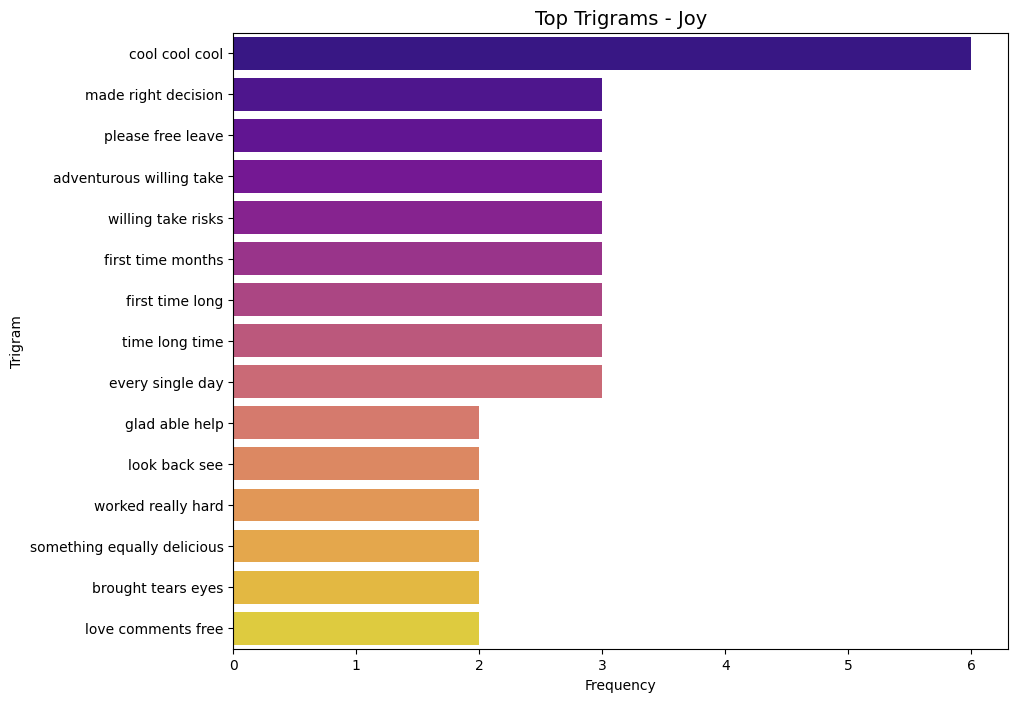

In [ ]:
   # Trigrams
tri = get_top_ngrams(texts, 3, 15)
plt.figure(figsize=(10,8))
sns.barplot(data=tri, x="count", y="ngram", palette="plasma")
plt.title(f"Top Trigrams - {emo.capitalize()}", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Trigram")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df["label"], test_size=0.2, random_state=42, stratify=df["label"])

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

bow = CountVectorizer()
X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

In [ ]:
results = []

# Naive Bayes (BoW)

nb_bow = MultinomialNB().fit(X_train_bow, y_train)
pred_nb_bow = nb_bow.predict(X_test_bow)
acc_nb_bow = accuracy_score(y_test, pred_nb_bow)
results.append(("Naive Bayes", "BoW", acc_nb_bow, pred_nb_bow))

# Naive Bayes (TF-IDF)

nb_tfidf = MultinomialNB().fit(X_train_tfidf, y_train)
pred_nb_tfidf = nb_tfidf.predict(X_test_tfidf)
acc_nb_tfidf = accuracy_score(y_test, pred_nb_tfidf)
results.append(("Naive Bayes", "TF-IDF", acc_nb_tfidf, pred_nb_tfidf))

# Logistic Regression (TF-IDF)

lr = LogisticRegression(max_iter=1000).fit(X_train_tfidf, y_train)
pred_lr = lr.predict(X_test_tfidf)
acc_lr = accuracy_score(y_test, pred_lr)
results.append(("Logistic Regression", "TF-IDF", acc_lr, pred_lr))

# Linear SVM (TF-IDF)

svm = LinearSVC().fit(X_train_tfidf, y_train)
pred_svm = svm.predict(X_test_tfidf)
acc_svm = accuracy_score(y_test, pred_svm)
results.append(("Linear SVM", "TF-IDF", acc_svm, pred_svm))

# XGBoost

xgb_clf = XGBClassifier(
        objective="multi:softmax",
        num_class=len(set(y_train)),
        eval_metric="mlogloss",
        n_estimators=200,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        learning_rate=0.1,
        n_jobs=2,
        tree_method="hist"
    ).fit(X_train_tfidf, y_train)
pred_xgb = xgb_clf.predict(X_test_tfidf)
acc_xgb = accuracy_score(y_test, pred_xgb)
results.append(("XGBoost", "TF-IDF", acc_xgb, pred_xgb))


results_df = pd.DataFrame(results, columns=["Model","Features","Accuracy","Predictions"]).sort_values("Accuracy", ascending=False)
print(results_df[["Model","Features","Accuracy"]])
best_model_name, best_features, best_acc, best_preds = results_df.iloc[0]


                 Model Features  Accuracy
3           Linear SVM   TF-IDF  0.888437
4              XGBoost   TF-IDF  0.879687
2  Logistic Regression   TF-IDF  0.853125
0          Naive Bayes      BoW  0.783125
1          Naive Bayes   TF-IDF  0.675937


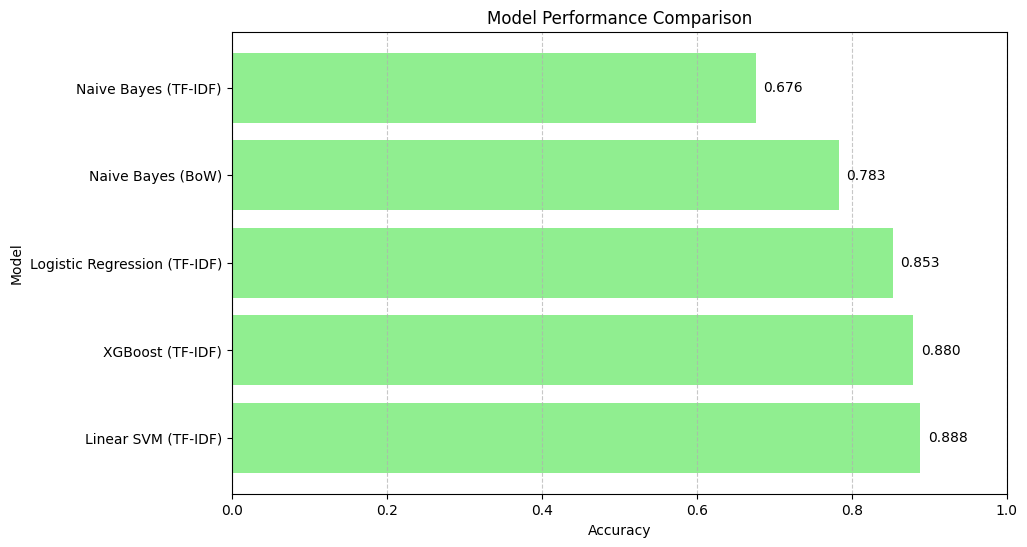

In [ ]:
plt.figure(figsize=(10,6))
bars = plt.barh(results_df['Model'] + " (" + results_df['Features'] + ")", results_df['Accuracy'], color='lightblue')
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels on each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', va='center')

plt.show()